<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Updated On                6699 non-null   object 
 1   State                     6699 non-null   object 
 2   Total Doses Administered  6364 non-null   float64
 3   First Dose Administered   6363 non-null   float64
 4   Second Dose Administered  6363 non-null   float64
dtypes: float64(3), object(2)
memory usage: 261.8+ KB


<ipython-input-11-978a260bd874>:22: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



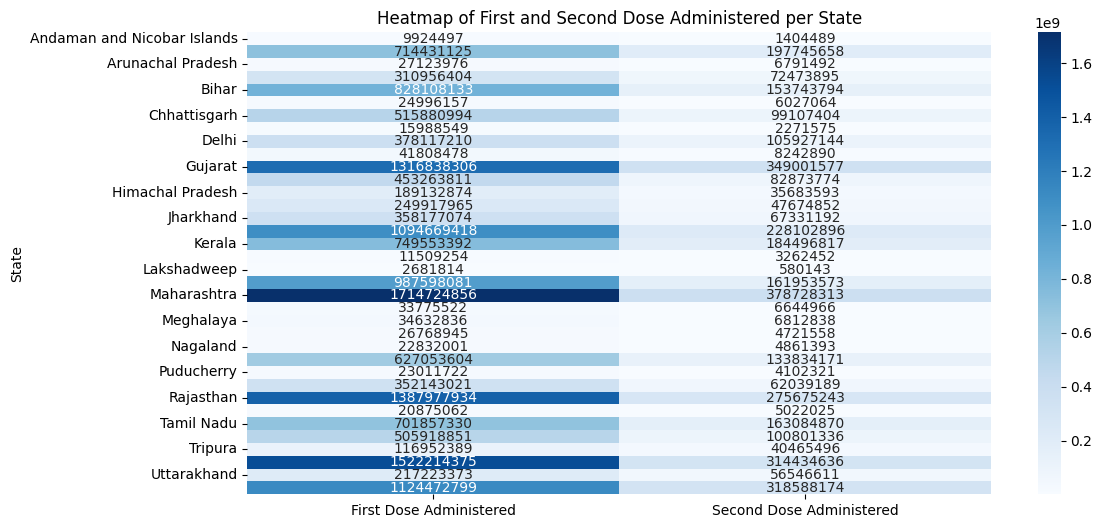

Map saved as India_Vaccine_Map.html


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium.plugins import MarkerCluster

# Load dataset
file_path = "covid_vaccine_statewise.csv"
df = pd.read_csv(file_path)

# Display dataset info
df.info()

# Fill missing values with 0
df.fillna(0, inplace=True)

# Convert date column to datetime format
if "Updated On" in df.columns:
    df["Updated On"] = pd.to_datetime(df["Updated On"], errors='coerce')

# Total First and Second Dose Administered per State
statewise_vaccine = df.groupby("State")[["First Dose Administered", "Second Dose Administered"]].sum().reset_index()
# Exclude India from statewise analysis if present
statewise_vaccine = statewise_vaccine[statewise_vaccine["State"] != "India"]

# Bar Chart: State-wise First and Second Dose Administered
fig = px.bar(statewise_vaccine, x="State", y=["First Dose Administered", "Second Dose Administered"],
             title="State-wise First and Second Dose Administered",
             labels={"value": "Doses Administered", "variable": "Dose Type"},
             barmode='group', height=600)
fig.show()


# Line Chart: Vaccination Trend Over Time
if "Updated On" in df.columns:
    df_time_series = df.groupby("Updated On")["Total Doses Administered"].sum().reset_index()
    fig = px.line(df_time_series, x="Updated On", y="Total Doses Administered",
                  title="Total Vaccination Trend Over Time", markers=True)
    fig.show()

# Scatter Plot: First vs Second Dose Administered per State
fig = px.scatter(statewise_vaccine, x="First Dose Administered", y="Second Dose Administered",
                 hover_data=["State"], title="First vs Second Dose Administered per State",
                 size="First Dose Administered", color="State")
fig.show()

# Pie Chart: Gender-wise Vaccination Distribution
if "Male (Doses Administered)" in df.columns and "Female (Doses Administered)" in df.columns:
    gender_vaccine = df[["Male (Doses Administered)", "Female (Doses Administered)"]].sum()
    gender_vaccine_df = pd.DataFrame({"Gender": gender_vaccine.index, "Doses Administered": gender_vaccine.values})
    fig = px.pie(gender_vaccine_df, values='Doses Administered', names='Gender', title="Gender-wise Vaccination Distribution")
    fig.show()

# Heatmap: State-wise Vaccination Status
plt.figure(figsize=(12, 6))
statewise_pivot = statewise_vaccine.set_index("State")
sns.heatmap(statewise_pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Heatmap of First and Second Dose Administered per State")
plt.show()

# Box Plot: Distribution of First Dose Administered Across States
fig = px.box(statewise_vaccine, y="First Dose Administered", title="Distribution of First Dose Administered Across States")
fig.show()

# Violin Plot: Distribution of Second Dose Administered Across States
fig = px.violin(statewise_vaccine, y="Second Dose Administered", title="Distribution of Second Dose Administered Across States", box=True, points="all")
fig.show()

# Mapping Vaccination Centers using Folium
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
marker_cluster = MarkerCluster().add_to(india_map)

# Sample State Coordinates (for visualization purposes, update with real coordinates if available)
state_coordinates = {
    "Maharashtra": [19.7515, 75.7139],
    "Delhi": [28.7041, 77.1025],
    "Karnataka": [15.3173, 75.7139],
    "West Bengal": [22.9868, 87.855],
    "Tamil Nadu": [11.1271, 78.6569],
}

for state, coord in state_coordinates.items():
    total_vaccinated = statewise_vaccine[statewise_vaccine['State'] == state]["First Dose Administered"].sum()
    folium.Marker(location=coord, popup=f"{state}: {total_vaccinated} Vaccinated", icon=folium.Icon(color='blue')).add_to(marker_cluster)

india_map.save("India_Vaccine_Map.html")
print("Map saved as India_Vaccine_Map.html")
